- **Name - Aditya Jain**
- **Batch No - DS2310**
- **Assingment - Student Grades Prediction**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv")
data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [3]:
print('No. Of Rows', data.shape[0])
print('No Of Columns', data.shape[1])

No. Of Rows 571
No Of Columns 43


In [4]:
#Let's sort columns by their Datatype
data.columns.to_series().groupby(data.dtypes).groups

{float64: ['CGPA'], object: ['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']}

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

**Observation**

- This data set contains null value.
- Except Seat number PH-121, HS-101, CS-105 columns, all column has null values.
- CGPA Column is our target variables an rest all are our features.

In [6]:
#lets drop seatno column
data = data.drop(columns=['Seat No.'], axis = 1)
data.shape

(571, 42)

In [7]:
#lets drop duplicates values from datasets
data.drop_duplicates()
data.shape

(571, 42)

**Data Integrity Check(Detecting Null values)**

In [8]:
data.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

As the columns the diffrent subjects and seat number implies for student, in this case, I'm checking null values as row wise and handle it mode of the grade of student in each row.

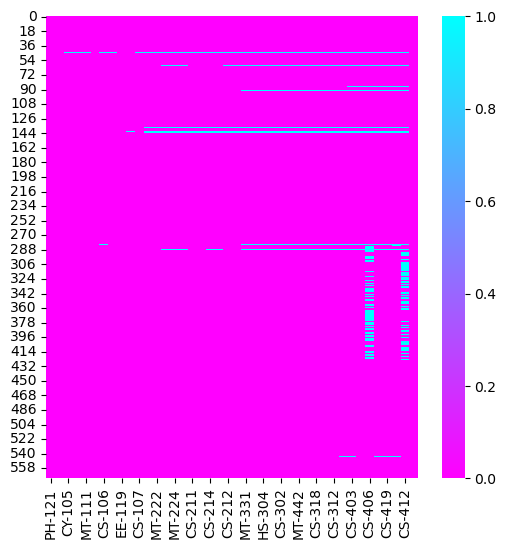

In [9]:
#Heatmap
plt.figure(figsize= (6,6))
sns.heatmap(data.isnull(), cmap = 'cool_r')
plt.show()

**Null Values Row-Wise**

In [10]:
row_null= data.isnull().sum(axis=1)
row_null

0      0
1      0
2      0
3      0
4      0
      ..
566    0
567    0
568    0
569    0
570    0
Length: 571, dtype: int64

In [11]:
null_rows = data[data.isnull().any(axis=1)]
count = null_rows.isnull().sum(axis = 1)
count

44     36
60     24
86      7
91     19
137    30
       ..
423     1
424     1
481     9
543     5
565    35
Length: 154, dtype: int64

In [12]:
row_to_drop= row_null[row_null > 33].index
data.drop(row_to_drop, inplace = True)

In [13]:
x = data.drop('CGPA', axis=1)#seprate features and Labels
y = data['CGPA']

dropped the rows which having more than 80% missing values.


filling null value with mode of each students and which rows have multiple mode, choose the first one.

In [14]:
def fillna(row):
    modes=row.mode()
    if len (modes) > 0:
        return row.fillna(modes[0])
    else:
        return row
    
x = x.apply(fillna, axis=1)
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C,C-,C-,C-,C-,A-,A,C-,B,A-
1,A,D,D+,D,B-,C,D,A,D+,D,...,D,D+,D,C,D,A-,B-,C,C,B
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,A-,B,B,A,C,A,A,A,A-,A
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,C-,D+,C,D+,C-,B-,B,C+,C+,C+
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,A-,B-,B+,B+,B-,A-,A,A-,A-,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,B+,A-,A-,A,A,A,B+,B+,B,A
567,A+,A,A,A,A,A,A,A-,A,A,...,A-,B+,B+,A,A,A-,B,A-,C,A-
568,B,A,A-,B+,A,A,A,A,A,B,...,B+,A-,B,A,B+,A,C,B+,A-,A-
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,B+,D,B,B,C-,D,C,B,B-,C


In [15]:
x[x.isnull().any(axis=1)]

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412


**Observation**

all our nulls are filled

# Data Visualization

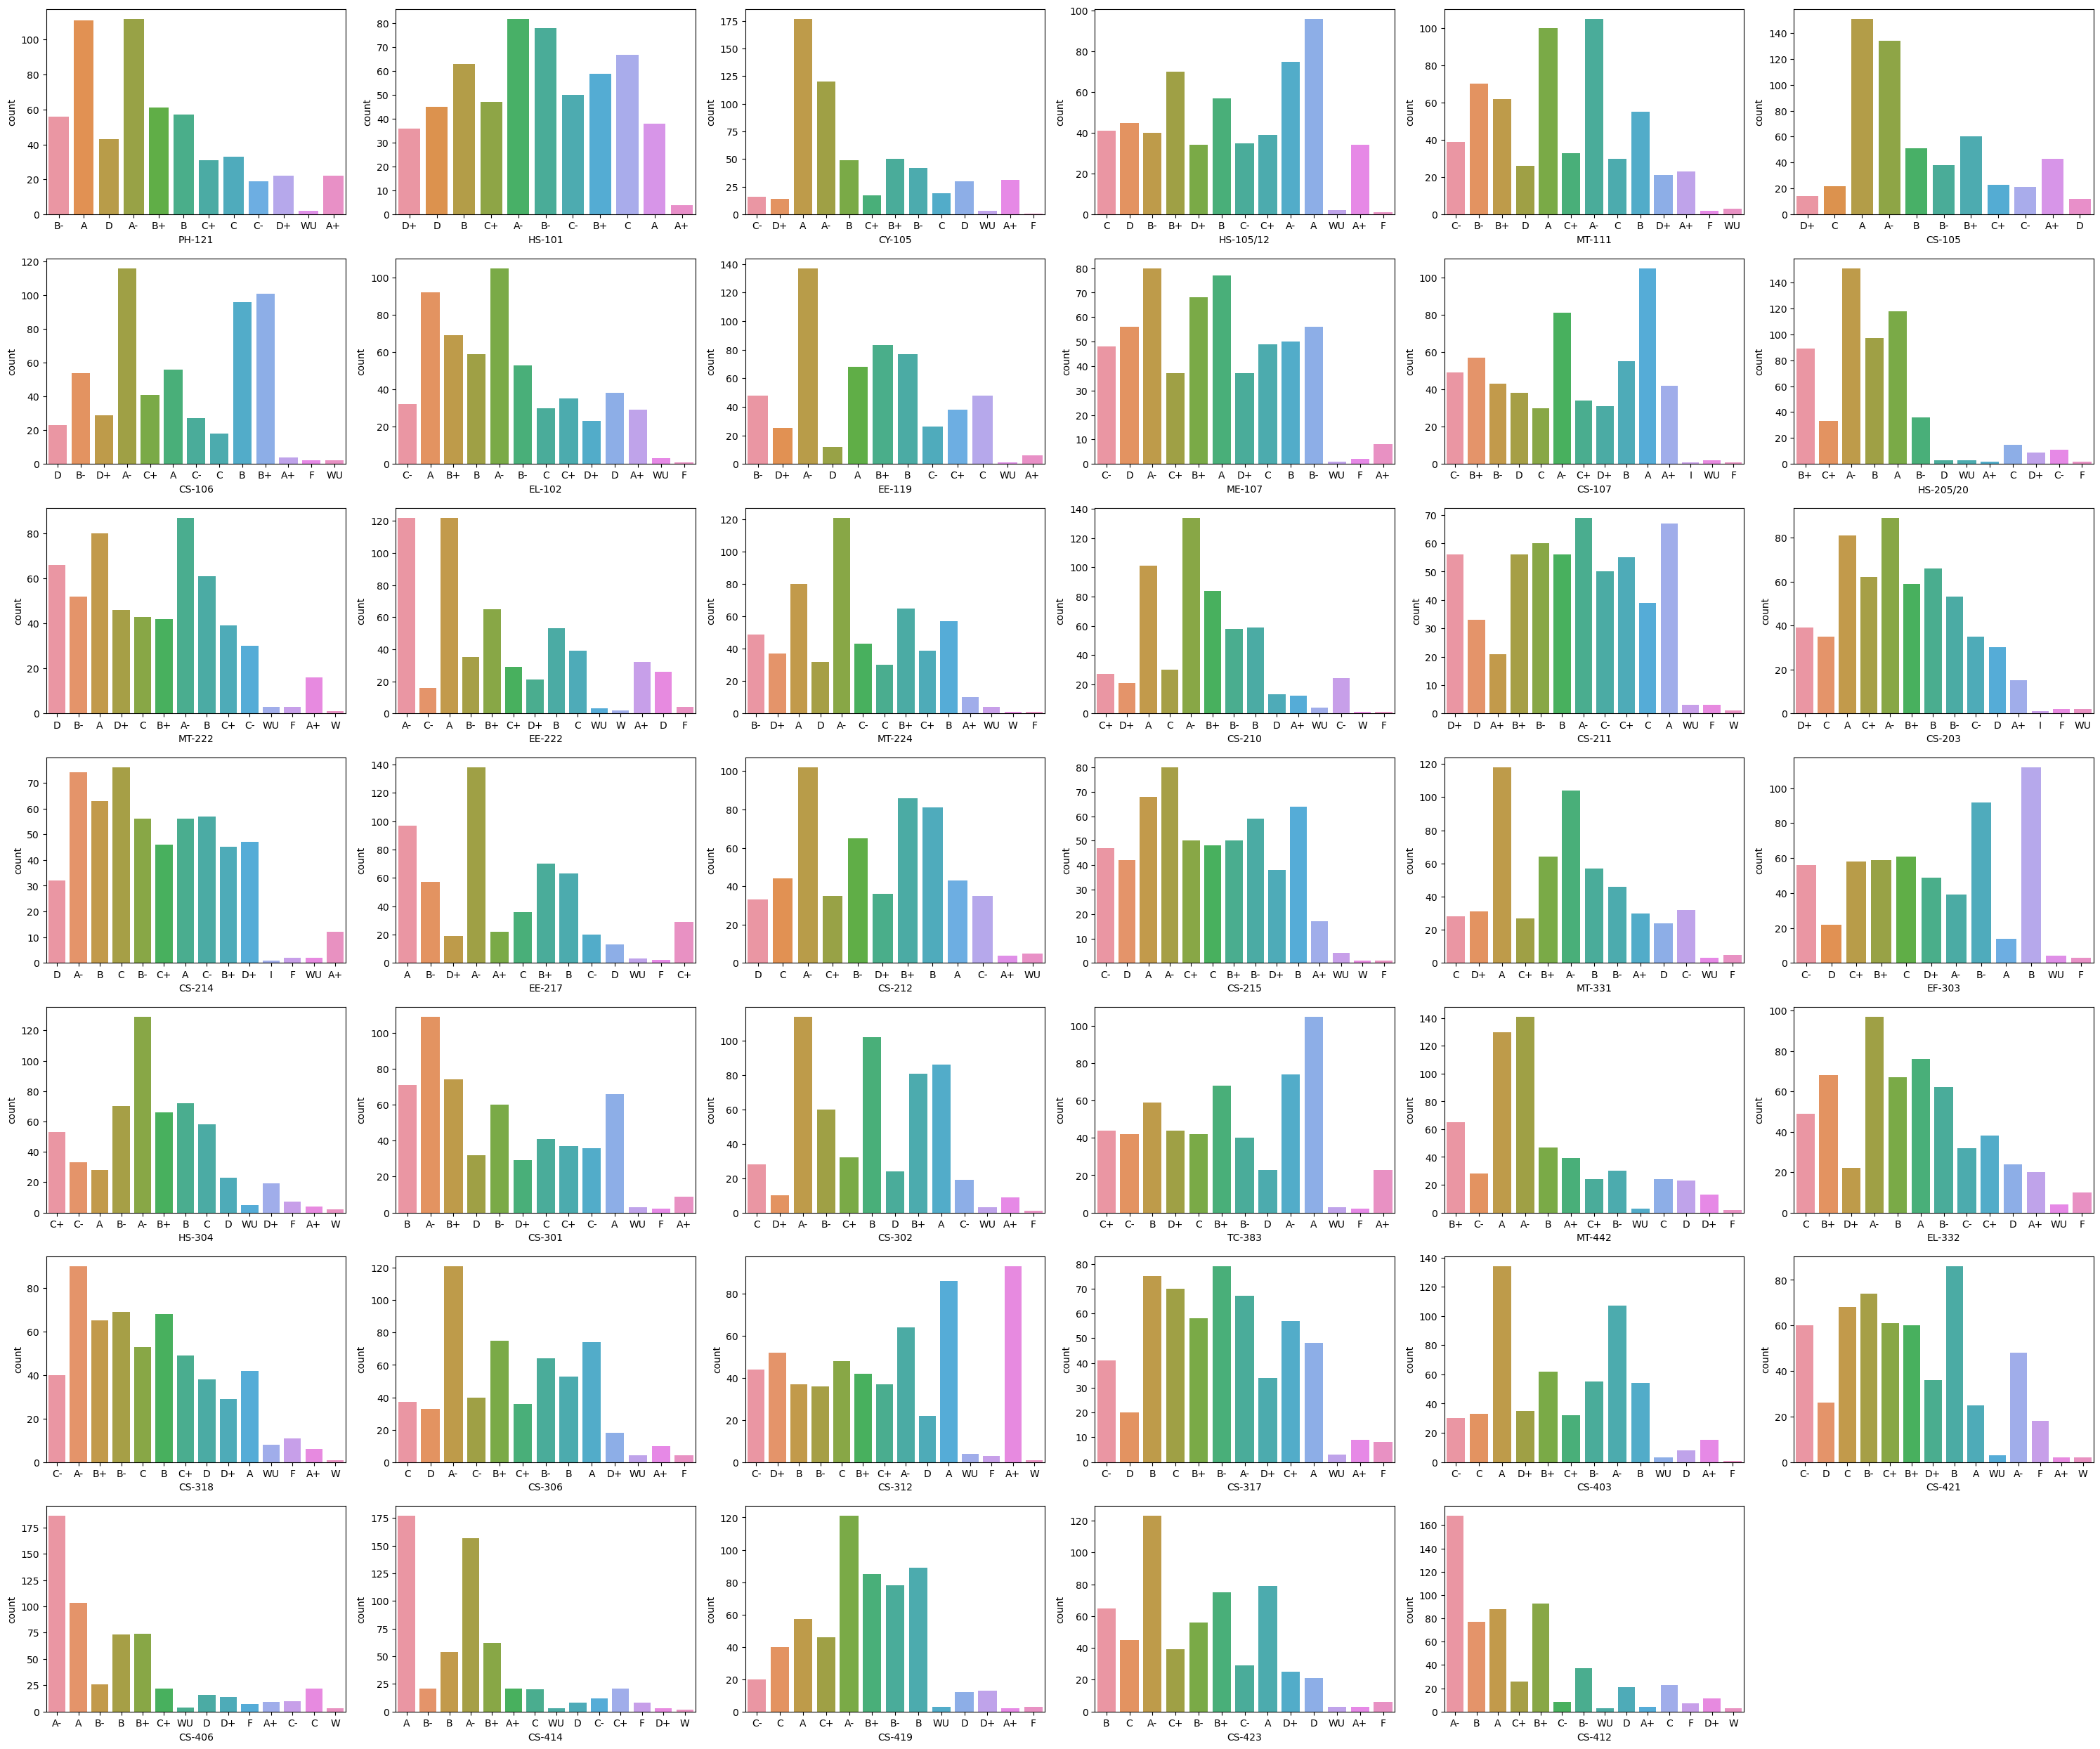

In [16]:
plt.figure(figsize=(30,25), facecolor='White')
plotnumber=1
for i in x.columns:
    if plotnumber <= 42:
        
        ax = plt.subplot(7,6,plotnumber)
        sns.countplot(x=x[i],data=x)
    plotnumber+=1
plt.tight_layout()

**Observation**

From countplot we can observe that all columns with dtype=object have 10 to 15 unique categories and all are having some counts

In [17]:
for a in x.columns:
    print(a)
    print("Number Of Unique Data",x[a].nunique())
    print("Value Counts")
    print(x[a].value_counts())
    print("")
    print("*******************************************************************************************************************")
    print("")

PH-121
Number Of Unique Data 12
Value Counts
A-    112
A     111
B+     61
B      57
B-     56
D      43
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
Name: PH-121, dtype: int64

*******************************************************************************************************************

HS-101
Number Of Unique Data 11
Value Counts
A-    82
B-    78
C     67
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
Name: HS-101, dtype: int64

*******************************************************************************************************************

CY-105
Number Of Unique Data 13
Value Counts
A     177
A-    120
B+     50
B      49
B-     42
A+     31
D      30
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64

*******************************************************************************************************************

HS-105/12
Number Of Unique Data 13
Value Counts
A     96
A-    75
B+    70
B     

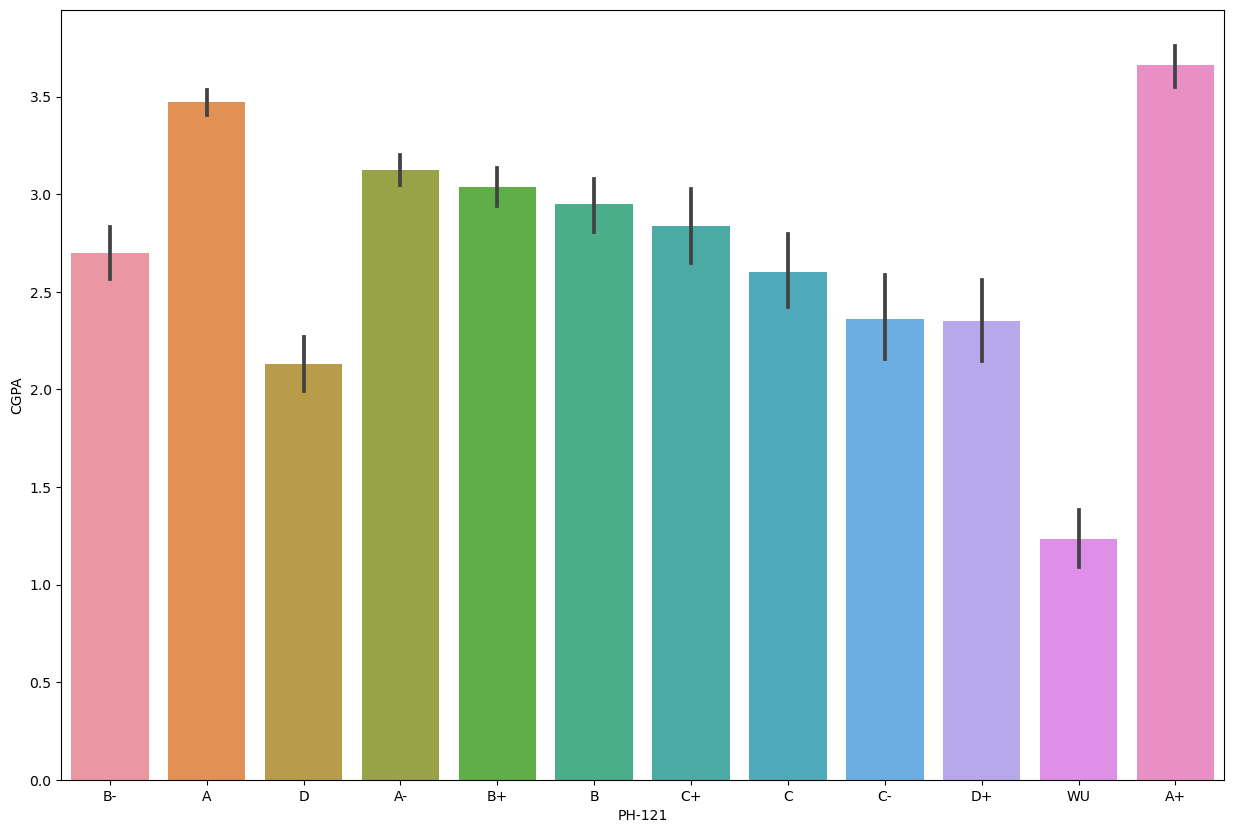

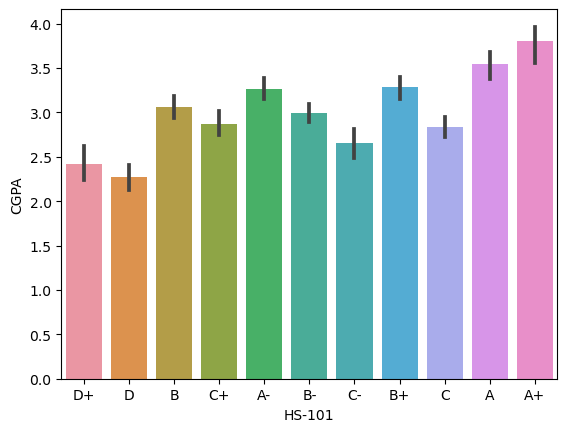

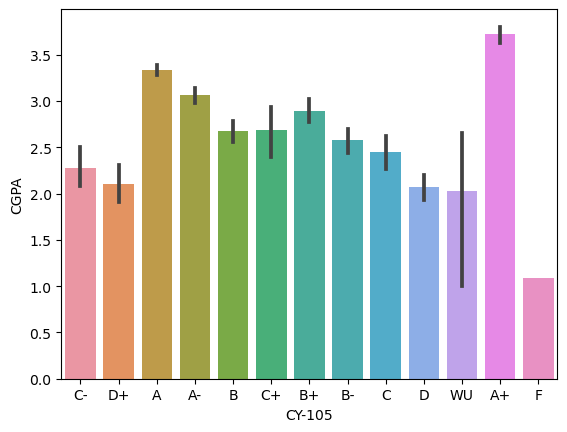

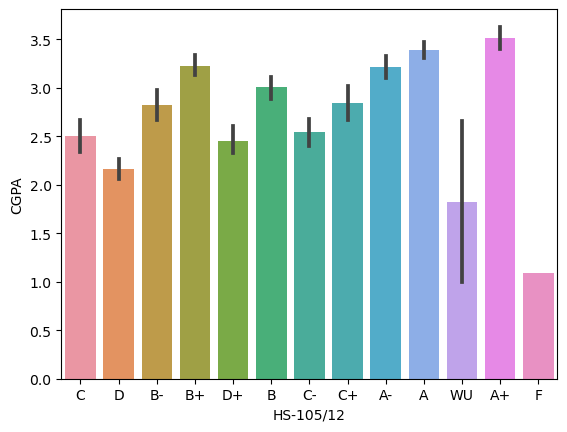

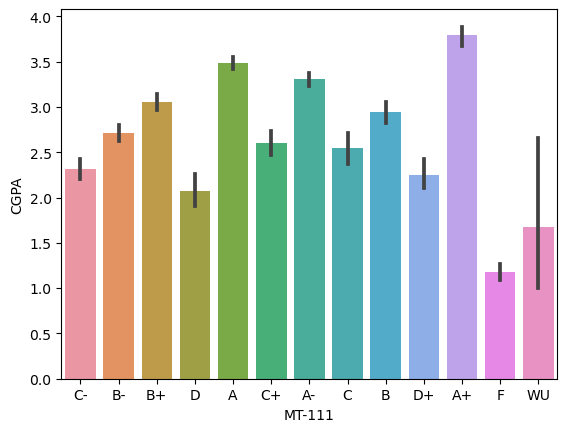

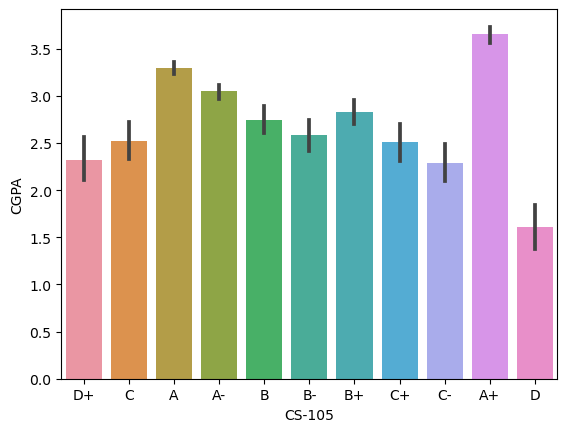

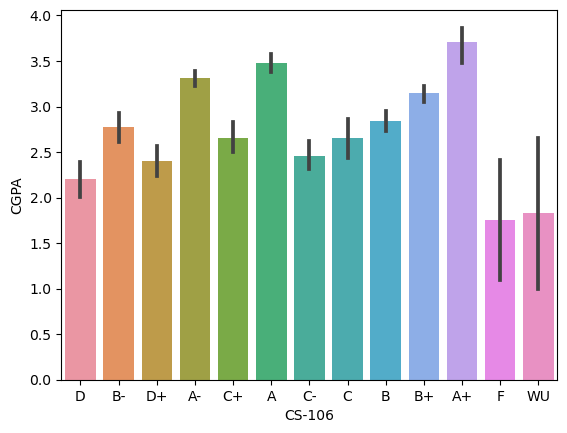

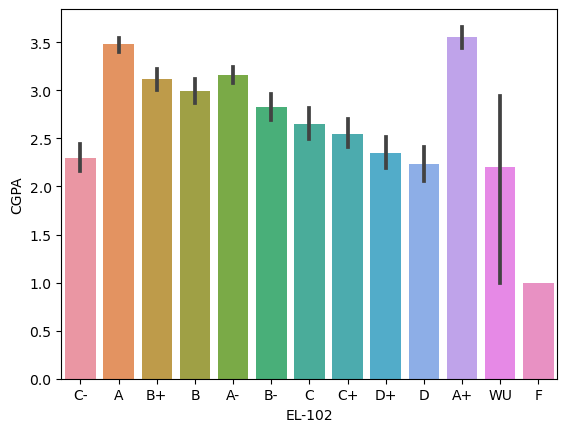

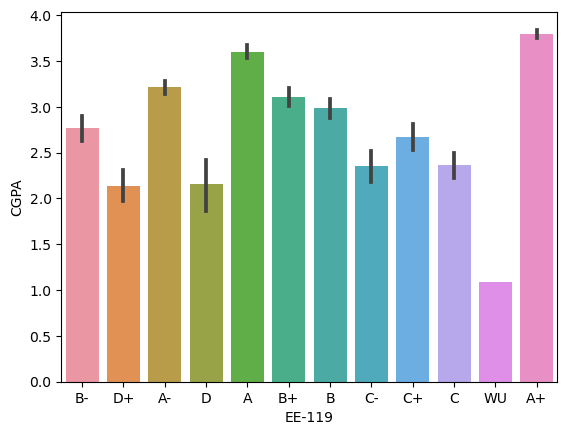

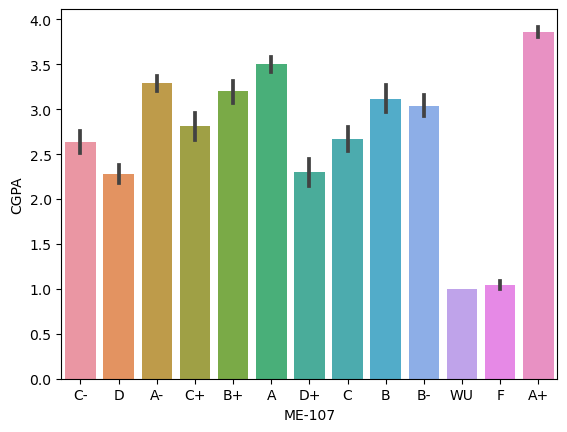

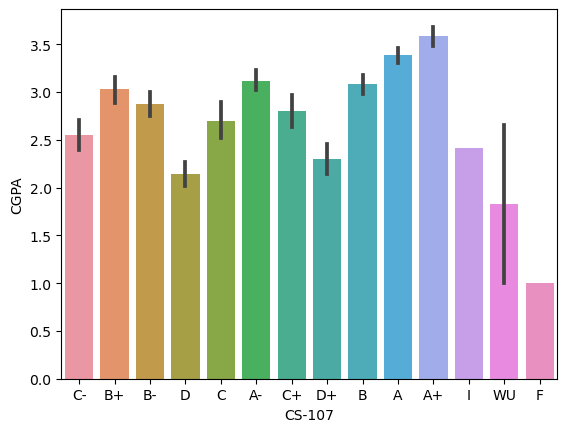

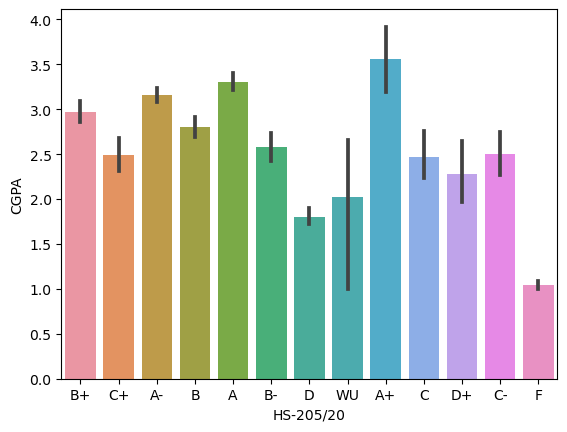

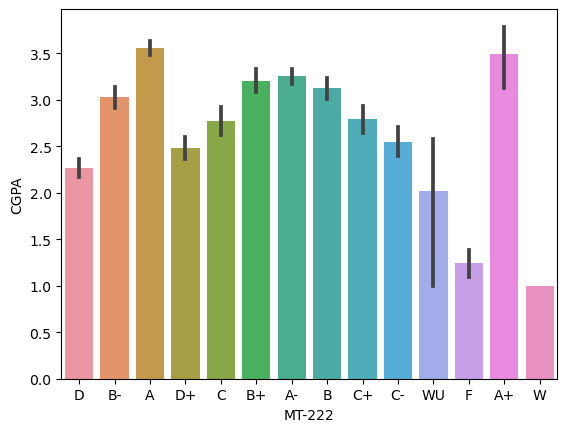

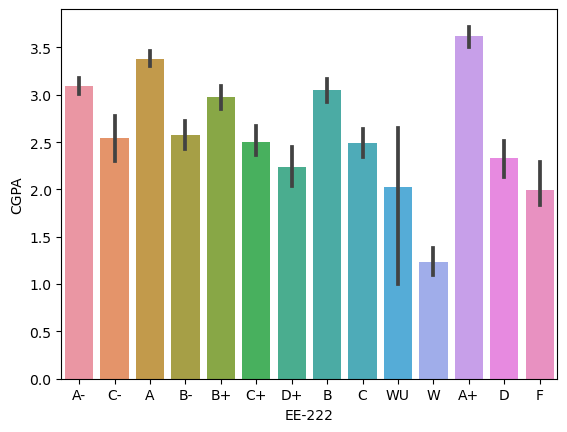

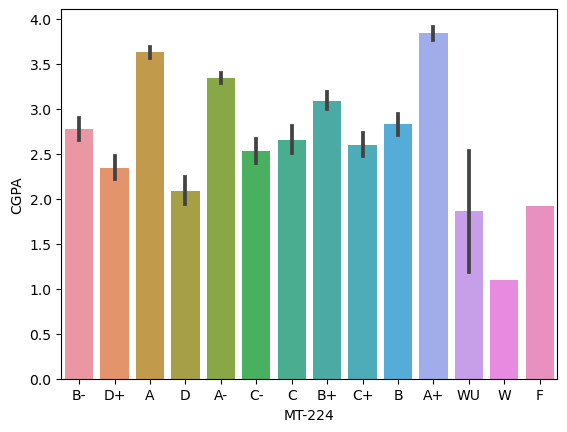

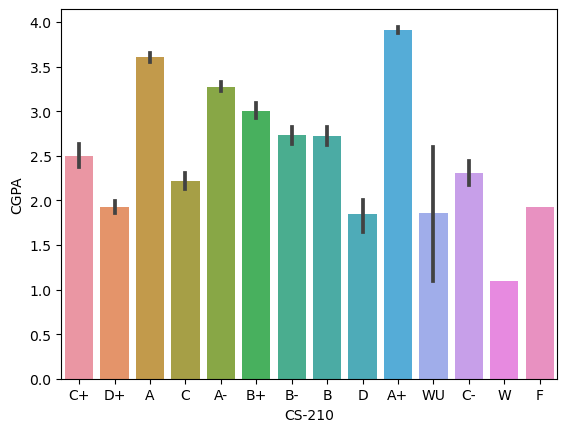

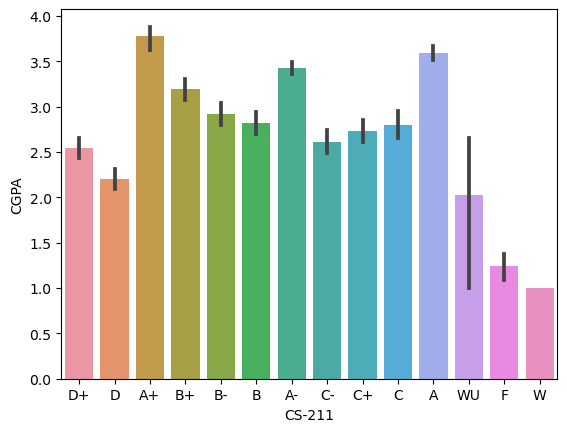

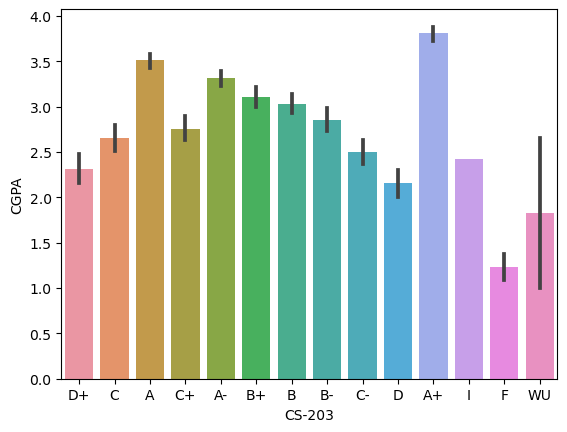

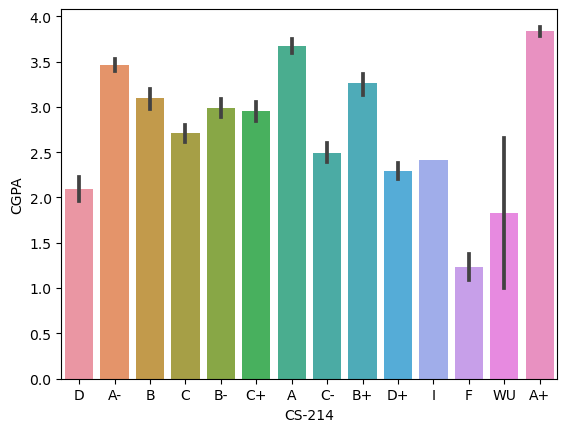

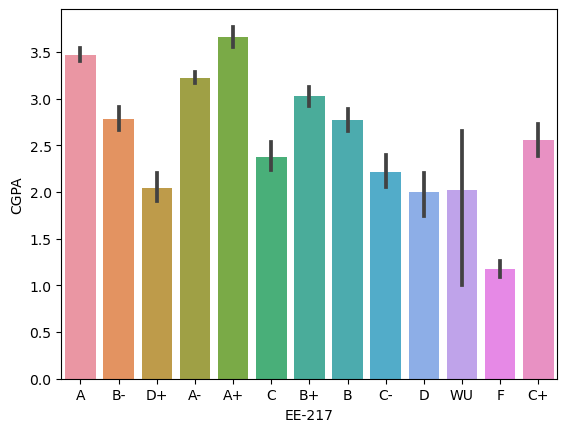

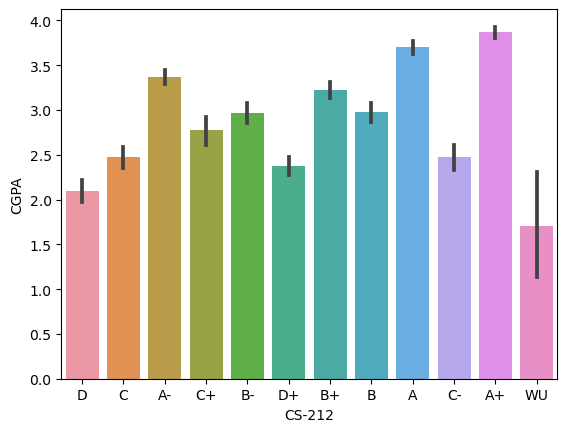

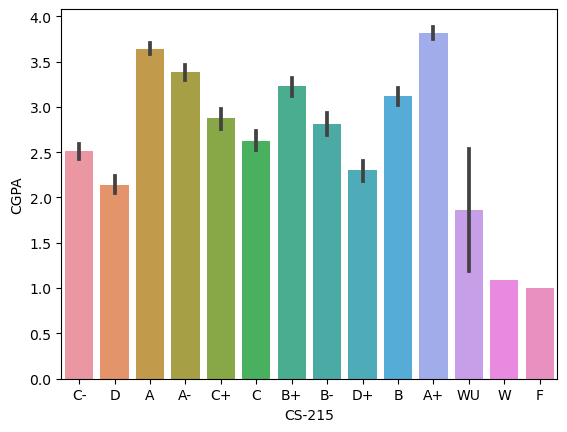

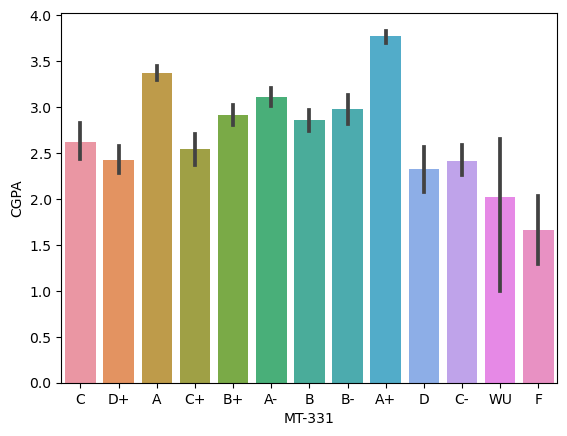

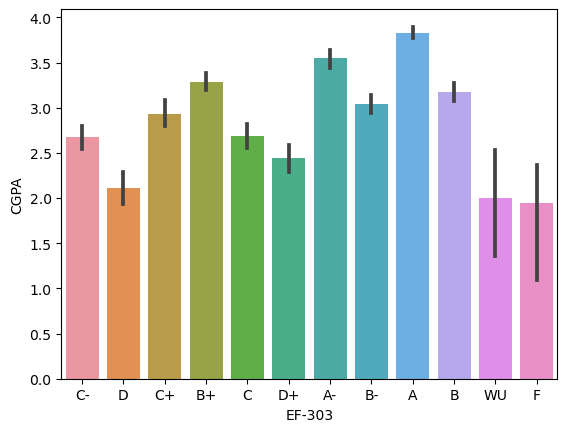

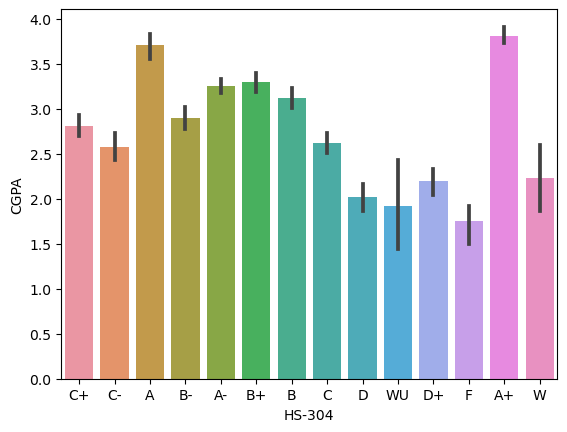

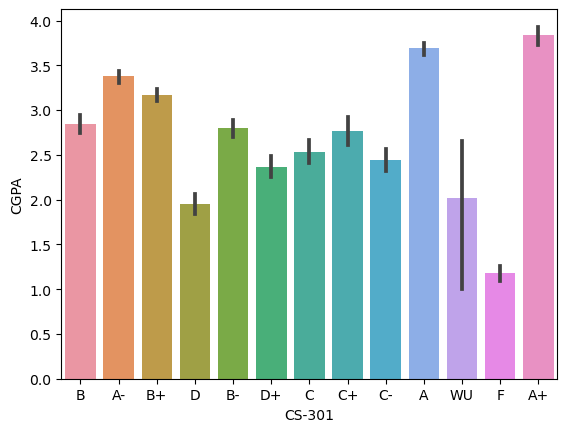

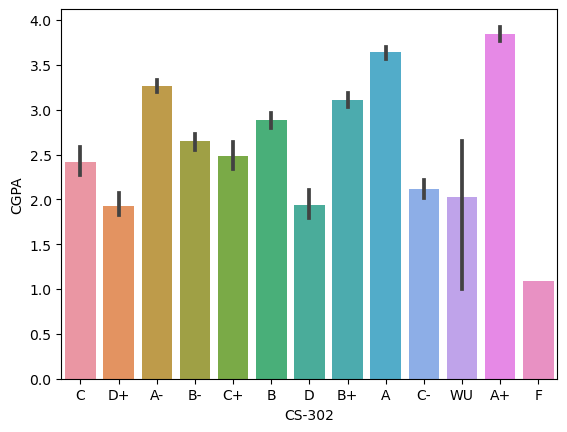

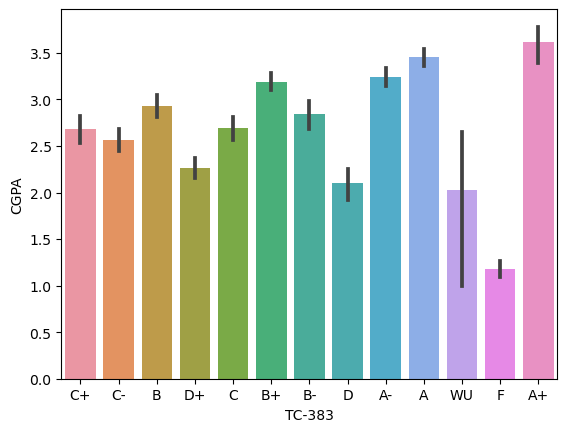

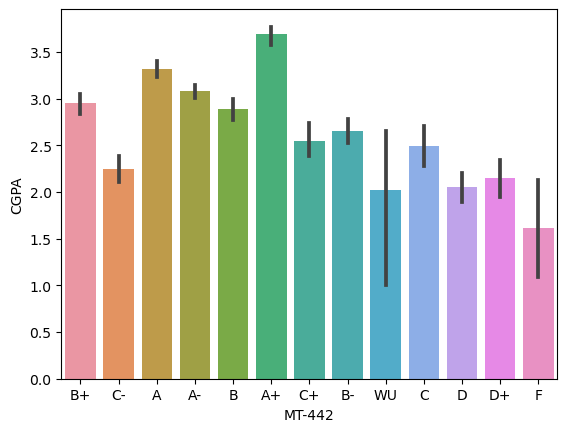

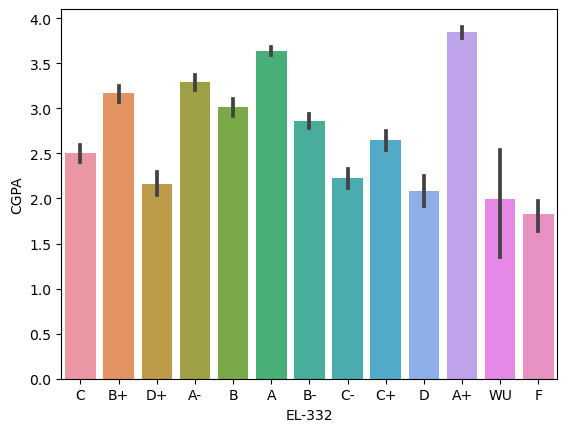

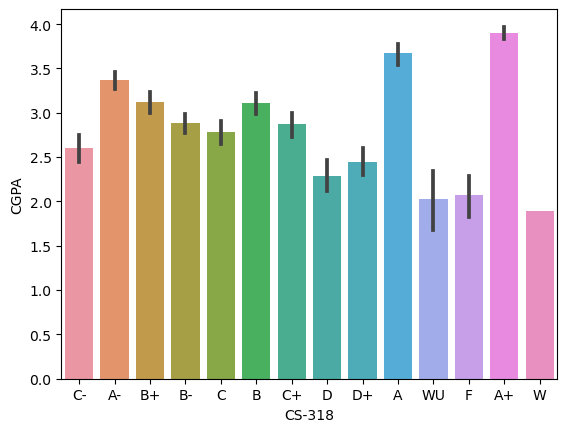

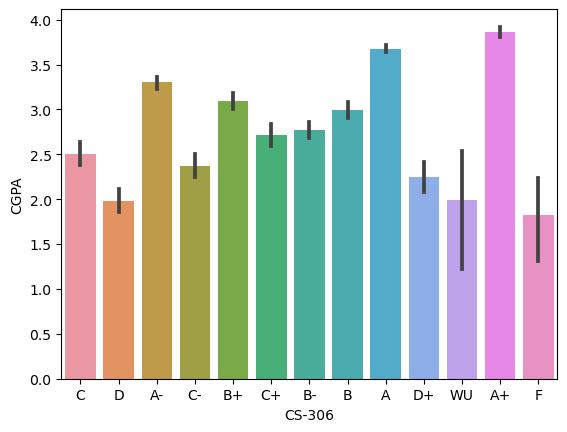

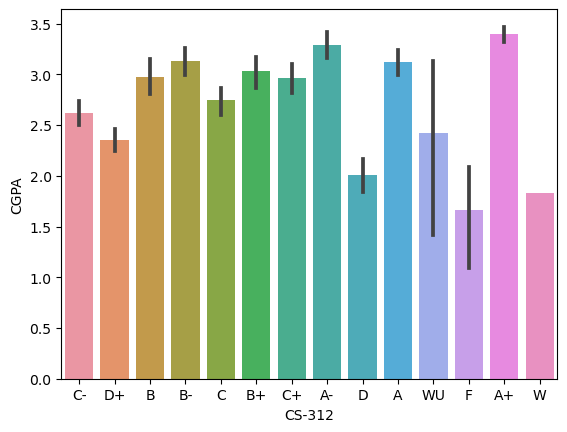

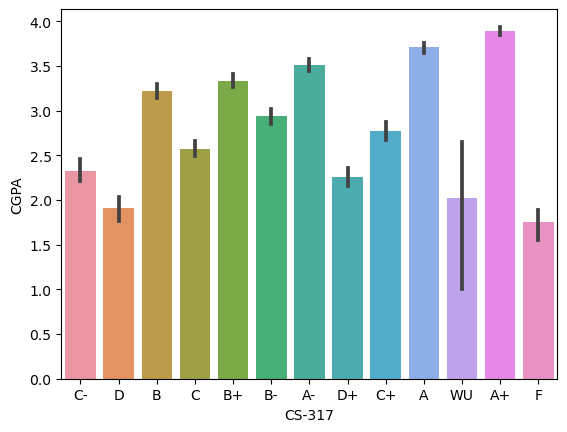

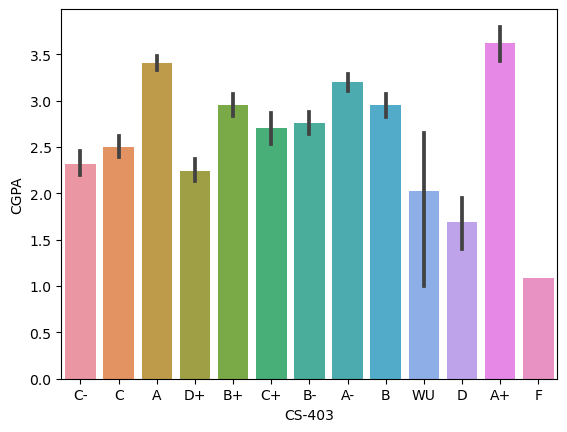

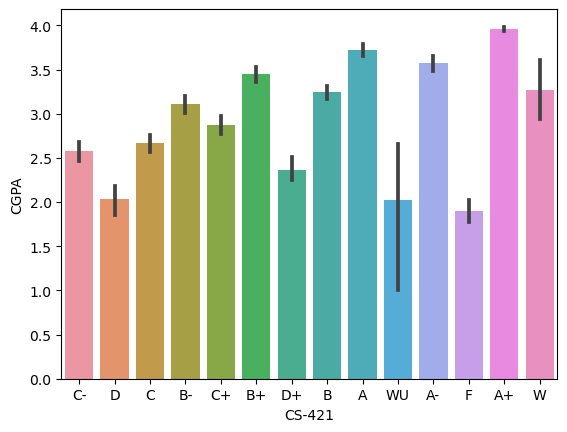

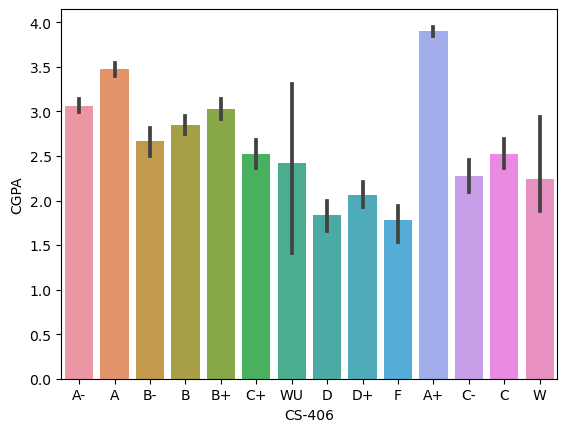

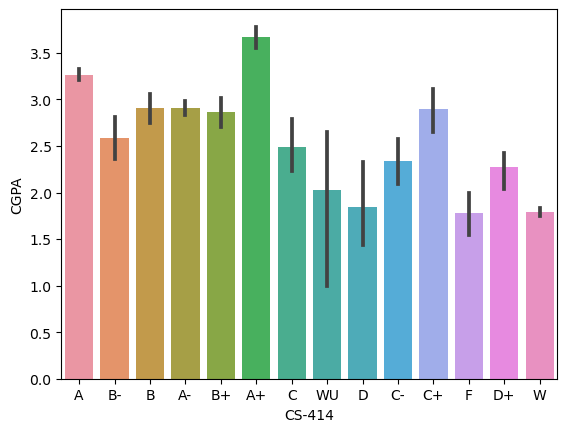

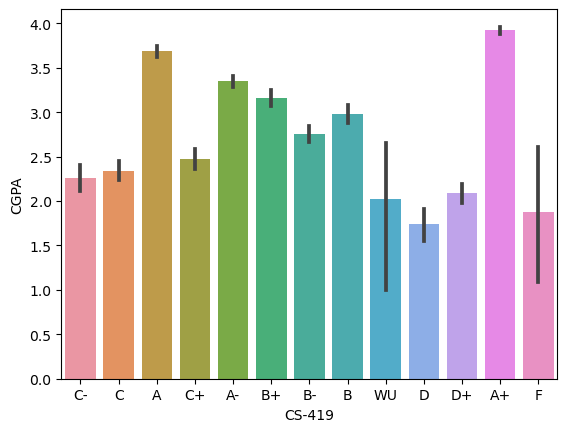

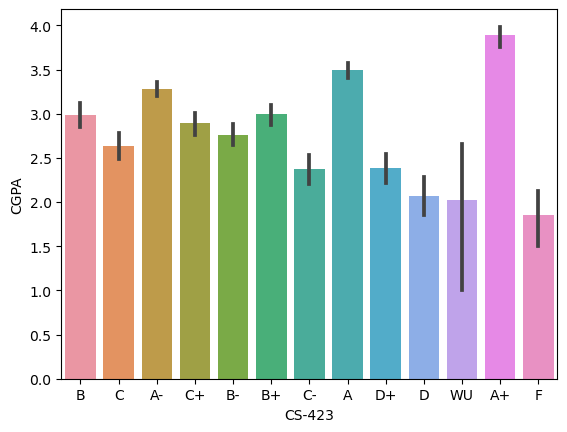

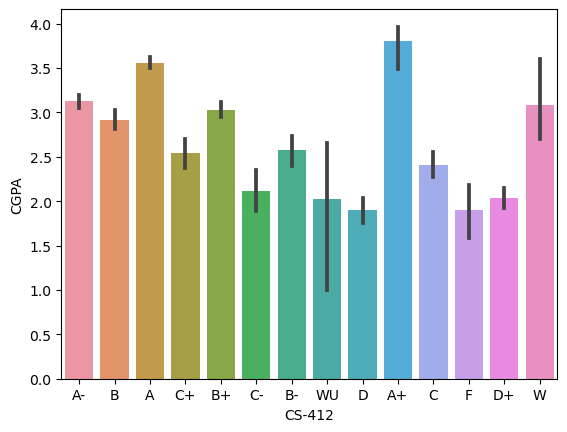

In [18]:
plt.figure(figsize=(15,10))
for i in x.columns:
    
    sns.barplot(x=x[i],y=data['CGPA'],data=data)
    plt.xlabel(i,fontsize=10)
    plt.ylabel('CGPA',fontsize = 10)
                                  
    plt.show()

# label encoder

In [19]:
from sklearn.preprocessing import LabelEncoder
for i in x.columns:
    label = LabelEncoder()
    x[i] = label.fit_transform(x[i])

In [20]:
x.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5,10,8,6,8,10,9,8,5,8,...,6,8,8,8,8,2,0,8,3,2
1,0,9,10,9,5,6,9,0,10,9,...,9,10,9,6,9,2,5,6,6,3
2,0,3,0,5,4,0,5,4,2,2,...,2,3,3,0,6,0,0,0,2,0
3,9,7,10,9,9,2,10,8,9,7,...,8,10,6,10,8,5,3,7,7,7
4,2,2,2,4,0,0,2,4,0,2,...,2,5,4,4,5,2,0,2,2,0


# Machine Learning and Model Building

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score


**Train_Test_Split**

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=112)
print('Training feature matrix size:', x_train.shape)
print('Training target vector :',y_train.shape)
print('Test feature matrix size :',x_test.shape)
print('Test target vector size :', y_test.shape)

Training feature matrix size: (426, 41)
Training target vector : (426,)
Test feature matrix size : (143, 41)
Test target vector size : (143,)


**Finding Best random State**

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRs=0
for i in range (1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.25, random_state=112)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    R2 = r2_score(y_test, y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score, 'on Random_state',maxRS)

Best accuracy is 0.9520793738147012 on Random_state 1


**Linear Regression**

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=112)
lrr = LinearRegression()
lrr.fit(x_train,y_train)
lrr.score(x_train,y_train)
y_pred = lrr.predict(x_test)
print('Predicted result price:\n', y_pred)
print('\n')
print('actual price\n', y_test)

Predicted result price:
 [1.96811609 2.98866092 2.9002484  3.1660534  3.95488197 2.85070981
 1.68318614 3.51185416 2.13783943 2.95448243 3.38955757 3.39289278
 3.22579019 3.46480803 1.9327935  2.49398775 3.09619356 3.14316572
 2.67063682 1.79426458 2.56981023 3.38537659 2.41607543 3.25313427
 2.76987304 3.74571544 3.03658516 2.74080778 2.18753532 3.01514092
 2.3818472  3.4716968  3.3851764  3.89627031 2.87451064 2.87582655
 3.14589953 3.32291555 2.06394718 2.20994474 2.65883916 3.69171913
 3.51976717 3.94277233 3.06912358 2.99170031 3.78914439 2.02170769
 2.4599877  3.32784197 2.2053219  1.97735814 2.9900931  2.52490477
 2.02471438 3.54388657 3.64327572 2.72736087 2.53813825 3.6237853
 2.98546003 3.77879672 2.72054318 3.27809697 1.99356603 3.19358296
 1.81277502 3.87059874 3.2205801  2.85895205 3.11828884 2.91446084
 2.93967684 3.8042396  2.83832382 2.26143457 2.68326444 3.18967309
 1.87168681 3.14222439 2.92517851 3.02728131 2.12763288 2.61665811
 2.55762743 2.24267403 3.35389871 2.83

**Linear Regression Evaluation Matrix**

In [25]:
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')

print('R2_Score',r2_score(y_test,y_pred))

Mean absolute error : 0.06421895097273349
Mean Squared error : 0.016406701316038087
Root Mean Squared error 0.12808864631979716


R2_Score 0.9520793738147012


**Apply other regression model**

**Random forest regressor**

In [26]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
y_pred = rf.predict(x_test)
    
print("Errors of",rf,":")
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2_Score',r2_score(y_test,y_pred))


Errors of RandomForestRegressor() :
Mean absolute error : 0.10276538461538445
Mean Squared error : 0.02118605938951042
Root Mean Squared error 0.14555431766014507


R2_Score 0.9381198442765684


**SVR**

In [27]:
svr = SVR()

svr.fit(x_train,y_train)
svr.score(x_train,y_train)
y_pred = svr.predict(x_test)
    
print("Errors of",svr,":")
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2_Score',r2_score(y_test,y_pred))

Errors of SVR() :
Mean absolute error : 0.06377009863985268
Mean Squared error : 0.006543472360964601
Root Mean Squared error 0.0808917323399901


R2_Score 0.9808878526570666


**Decision Tree**

In [28]:
dt = DecisionTreeRegressor()

dt.fit(x_train,y_train)
dt.score(x_train,y_train)
y_pred = dt.predict(x_test)
    
print("Errors of",dt,":")
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2_Score',r2_score(y_test,y_pred))

Errors of DecisionTreeRegressor() :
Mean absolute error : 0.199006993006993
Mean Squared error : 0.07041365034965036
Root Mean Squared error 0.2653557053271144


R2_Score 0.7943360976865306


**AdaBoost Regressor**

In [29]:
ab= AdaBoostRegressor()
ab.fit(x_train,y_train)
ab.score(x_train,y_train)
y_pred = ab.predict(x_test)
    
print("Errors of",ab,":")
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2_Score',r2_score(y_test,y_pred))

Errors of AdaBoostRegressor() :
Mean absolute error : 0.153636181253617
Mean Squared error : 0.03215399331015329
Root Mean Squared error 0.17931534599736101


R2_Score 0.9060847476832998


**KNeighbors Regressor**

In [30]:
kn= KNeighborsRegressor()
kn.fit(x_train,y_train)
kn.score(x_train,y_train)
y_pred = kn.predict(x_test)
    
print("Errors of",kn,":")
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2_Score',r2_score(y_test,y_pred))

Errors of KNeighborsRegressor() :
Mean absolute error : 0.08958321678321678
Mean Squared error : 0.01777629594405595
Root Mean Squared error 0.13332777634107587


R2_Score 0.9480790674197478


**Bagging Regressor**

In [31]:
br= BaggingRegressor()
br.fit(x_train,y_train)
br.score(x_train,y_train)
y_pred = br.predict(x_test)
    
print("Errors of",br,":")
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2_Score',r2_score(y_test,y_pred))

Errors of BaggingRegressor() :
Mean absolute error : 0.11830909090909088
Mean Squared error : 0.025223626853146844
Root Mean Squared error 0.15881947882154393


R2_Score 0.9263269337215556


**Gradient Boosting**

In [32]:
gab= GradientBoostingRegressor()
gab.fit(x_train,y_train)
gab.score(x_train,y_train)
y_pred = gab.predict(x_test)
    
print("Errors of",gab,":")
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2_Score',r2_score(y_test,y_pred))

Errors of GradientBoostingRegressor() :
Mean absolute error : 0.08249986987759281
Mean Squared error : 0.011856521722216533
Root Mean Squared error 0.10888765642723941


R2_Score 0.9653695197856252


# We can see that SVR Model give us maximum R2 Score

**Cross Validation Score**

In [33]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(svr, x,y,cv=5)
print("Cross Validation Score",lr)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score LinearRegression()
CVS Score :  [0.97264221 0.95718424 0.96244435 0.96594147 0.95693279]
Mean CVS Score :  0.9630290134590436
Std Deviation :  0.005874743564427026


# Hyper Parameter Tunning: GridSearchCV

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
parameter= {
        'C':[1,5,10,15,20],
        'epsilon':[0.2,0.5,0.6,1.0,1.2,1.5],
        'gamma':[0.001,0.1,0.2,0.002,0.02]
}

In [36]:
gc = GridSearchCV(SVR(),parameter,verbose=5)
gc.fit(x_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END .....C=1, epsilon=0.2, gamma=0.001;, score=0.945 total time=   0.0s
[CV 2/5] END .....C=1, epsilon=0.2, gamma=0.001;, score=0.939 total time=   0.0s
[CV 3/5] END .....C=1, epsilon=0.2, gamma=0.001;, score=0.969 total time=   0.0s
[CV 4/5] END .....C=1, epsilon=0.2, gamma=0.001;, score=0.979 total time=   0.0s
[CV 5/5] END .....C=1, epsilon=0.2, gamma=0.001;, score=0.914 total time=   0.0s
[CV 1/5] END ......C=1, epsilon=0.2, gamma=0.1;, score=-0.009 total time=   0.0s
[CV 2/5] END ......C=1, epsilon=0.2, gamma=0.1;, score=-0.033 total time=   0.0s
[CV 3/5] END .......C=1, epsilon=0.2, gamma=0.1;, score=0.008 total time=   0.0s
[CV 4/5] END ......C=1, epsilon=0.2, gamma=0.1;, score=-0.017 total time=   0.0s
[CV 5/5] END .......C=1, epsilon=0.2, gamma=0.1;, score=0.002 total time=   0.0s
[CV 1/5] END ......C=1, epsilon=0.2, gamma=0.2;, score=-0.016 total time=   0.0s
[CV 2/5] END ......C=1, epsilon=0.2, gamma=0.2

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 5, 10, 15, 20],
                         'epsilon': [0.2, 0.5, 0.6, 1.0, 1.2, 1.5],
                         'gamma': [0.001, 0.1, 0.2, 0.002, 0.02]},
             verbose=5)

In [37]:
gc.best_params_

{'C': 1, 'epsilon': 0.2, 'gamma': 0.001}

# Final Model

In [40]:
best = gc.best_estimator_
best.fit(x_train,y_train)
o = best.predict(x_test)
print('R2_Score',r2_score(y_test,o))
print('Mean absolute error :',mean_absolute_error(y_test,o))
print('Mean Squared error :', mean_squared_error(y_test, o))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,o)))

R2_Score 0.9731356322932254
Mean absolute error : 0.06810446066174575
Mean Squared error : 0.009197618898070378
Root Mean Squared error 0.09590421731118177


In [41]:
score = cross_val_score(best,x,y)
print("Diffrence of R2 score and cross vald score is ", (r2_score(y_test,o)-score.mean())*100)

Diffrence of R2 score and cross vald score is  1.1783961806311583


# Predicting the final model

In [42]:
# Prediction
prediction = best.predict(x_test)

In [45]:
Actual = np.array(y_test)
data_pred = pd.DataFrame()
data_pred["Predicted Values"] = prediction
data_pred["Actual Values"] = Actual
data_pred.head()

,Predicted Values,Actual Values
0,1.942227,1.747
1,2.923511,2.984
2,2.874807,2.956
3,3.112627,3.179
4,3.754202,3.949


# Saving the model

In [46]:
import joblib
joblib.dump(svr,'Student Grades Prediction')

['Student Grades Prediction']